# STAT 207: Advanced Optimization Topics



## Inequality constraint - interior point method

- We consider the constrained optimization
$$
\text{min} f_0(x)
$$ 
subject to 
$$
\begin{aligned}
f_j(x) &\le 0,\quad 1 \leq j \leq m; \\
Ax &= b,
\end{aligned}
$$
where $f_0,...,f_m: R^n \rightarrow R$ are convex and twice continuously differentiable, and $A$ as full row rank.

- Assume the problem is solvable with optimal point $\mathbf{x}^*$ and optimal value $f_0(\mathbf{x}^*) = p^*$.

- KKT conditions:

$$
\begin{aligned}
\mathbf{A}\mathbf{x}^* = \mathbf{b},\; f_i(\mathbf{x}^*) &\le 0, i=1,..,m \quad \text{(primal feasibility)} \\
\lambda_i^* &\ge 0, i=1,..,m \\
\nabla f_0(\mathbf{x}^*) + \sum_{i=1}^m \lambda_i^* \nabla f_i(\mathbf{x}^*) + \mathbf{A}^T\boldsymbol{\nu}^* &= 0 
 \quad \text{(dual feasibility)} \\
\lambda_i^*f_i(\mathbf{x}^*) &= 0, \quad i=1,\ldots,m.
\end{aligned}
$$

### Barrier method¶

- Convert the problem to implicitly include the  inequality constraints in the objective and minimize 
$$
f_0(\mathbf{x}) + \sum_{i=1}^m I_-(f_i(\mathbf{x}))
$$ 
subject to $\mathbf{A}\mathbf{x} = \mathbf{b}$, where 
$$
I_-(u) = \begin{cases} 0 & \text{if } u \leq 0 \\ \infty & \text{if } u > 0 \end{cases}.
$$

- And to approximate $I_-$ by a differentiable function
$$
\widehat{I}_-(u) = -(1/t)\log(-u), \quad u<0,
$$
where $t>0$ is a parameter tuning the approximation accuracy. As $t$ increases, the approximation becomes more accurate.

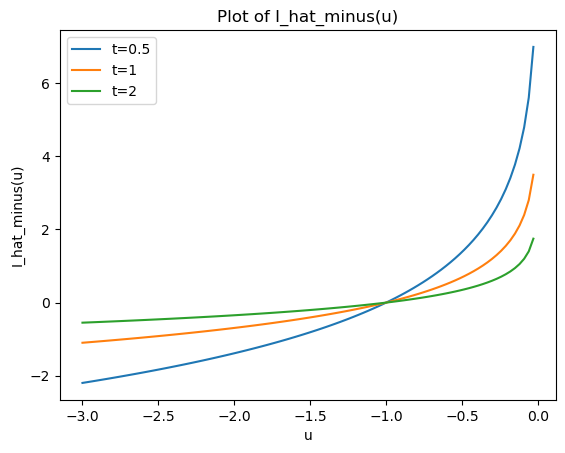

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Ignore the specific warning
warnings.filterwarnings("ignore", category=RuntimeWarning)

def I_hat_minus(u, t):
    return -(1/t) * np.log(-u)

u = np.linspace(-3, 0, 100)
t_values = [0.5, 1, 2]

for t in t_values:
    plt.plot(u, I_hat_minus(u, t), label=f't={t}')

plt.xlabel('u')
plt.ylabel('I_hat_minus(u)')
plt.legend()
plt.title('Plot of I_hat_minus(u)')
plt.grid(False)
plt.show()


- The barrier method solves a sequence of equality-constraint problems
$$
\begin{aligned}
\min \quad t f_0(\mathbf{x}) - \sum_{i=1}^{m} \log(-f_i(\mathbf{x}))  \\
\text{subject to} \quad \mathbf{A}\mathbf{x} = \mathbf{b},
\end{aligned}
$$
with increased parameter $t$ at each step and starting each Newton minimization at the solution for the previous value of $t$.

- The function $\phi(\mathbf{x}) = - \sum_{i=1}^{m} \log(-f_i(\mathbf{x}))$ is called the **logarithmic barrier** or **log barrier** function.

- Denote the solution at $t$ by $\mathbf{x}^*(t)$. Using the duality theory, we can show
$$
f_0(\mathbf{x}^*(t)) - p^* \le m/t.
$$


<div>
<img src="barrier.jpg" alt="Barrier method" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{barrier.jpg}
\end{center}

- Barrier method has to start from a **strictly feasible point**. We can find such a point by solving
$$
\text{min} s
$$ 
subject to 
$$
\begin{aligned}
f_j(x) &\le s,\quad 1 \leq j \leq m; \\
Ax &= b,
\end{aligned}
$$
by the barrier method.



## Penalty Method

- Unlike the barrier method that works from the interior of the feasible region, the penalty method works from the outside of the feasible region inward.

- Construct a continuous nonnegative penalty $p(x)$ that is 0 on the feasible region and positive outside it. 

- Optimize
$$
f_0(x) + \lambda_k p(x)
$$
for an increasing sequence $\lambda_k$.


**Example** (Linear Regression with Linear Constraints) Consider the regression problem of minimizing $\|Y - X\beta \|_2^2$ subject to the linear constraints $V\beta = d$. If we take the penalty function $p(\beta) = \|V\beta - d\|_2^2$, then we must minimize at each stage the function
$$
h_k(\beta) = \|Y - X\beta\|_2^2 + \lambda_k \|V\beta - d\|_2^2.
$$
Setting the gradient
$$
\nabla h_k(\beta) = -2X^T(Y - X\beta) + 2\lambda_k V^T(V\beta - d) = 0
$$
yields the sequence of solutions
$$
\beta_k = (X^TX + \lambda_kV^TV)^{-1}(X^TY + \lambda_kV^T d).
$$

- Ascent and descent properties of the penalty and barrier methods.

**Proposition 16.2.1**: Consider two real-valued functions $f(x)$ and $g(x)$ on a common domain and two positive constants $\alpha < \omega$. Suppose the linear combination $f(x) + \alpha g(x)$ attains its minimum value at $y$, and the linear combination $f(x) + \omega g(x)$ attains its minimum value at $z$. Then, $f(y) \leq f(z)$ and $g(y) \ge g(z)$.

- Global convergence for the penalty method.

**Proposition 16.2.2** Suppose that both the objective function $f(x)$ and the penalty function $p(x)$ are continuous on $\mathbb{R}^m$, and the penalized functions $h_k(x) = f(x) + \lambda_k p(x)$ are coercive on $\mathbb{R}^m$. Then, one can extract a corresponding sequence of minimum points $x_k$ such that $f(x_k) \le f(x_{k+1})$. Furthermore, any cluster point of this sequence resides in the feasible region $C = \{x : p(x) = 0\}$ and attains the minimum value of $f(x)$ within $C$. Finally, if $f(x)$ is coercive and possesses a unique minimum point in $C$, then the sequence $x_k$ converges to that point.

- Global convergence for the barrier method.

**Proposition 16.2.3** Suppose the real-valued function $f(x)$ is continuous on the bounded open set $U$ and its closure $V$. Additionally, suppose the barrier function $b(x)$ is continuous and coercive on $U$. If the tuning constants $\mu_k$ decrease to 0, then the linear combinations $h_k(x) = f(x) + \mu_k b(x)$ attain their minima at a sequence of points $x_k$ in $U$ satisfying the descent property $f(x_{k+1}) \leq f(x_k)$. Furthermore, any cluster point of the sequence furnishes the minimum value of $f(x)$ on $V$. If the minimum point of $f(x)$ in $V$ is unique, then the sequence $x_k$ converges to this point.

- Possible defects of of the penalty and barrier methods:

    - iterations within iterations
    
    - choosing the tuning parameter sequence
    
    - numerical instability

## Linear Programming

- A general linear program takes the form:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top \mathbf{x} \\
\text{subject to} & \quad \mathbf{A}\mathbf{x} = \mathbf{b} \\
& \quad \mathbf{G}\mathbf{x} \preceq \mathbf{h}.
\end{aligned}
$$

A linear program is a convex optimization problem, why?

<div>
<img src="lp.jpg" alt="LP" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.7\textwidth]{lp.jpg}
\end{center}

- The **standard form** of a linear program (LP) is:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top \mathbf{x} \\
\text{subject to} & \quad \mathbf{A}\mathbf{x} = \mathbf{b} \\
& \quad \mathbf{x} \succeq \mathbf{0}
\end{aligned}
$$

To transform a general linear program into the standard form, we introduce *slack variables* $\mathbf{s} \succeq \mathbf{0}$ such that $\mathbf{G}\mathbf{x} + \mathbf{s} = \mathbf{h}$. Then we write $\mathbf{x} = \mathbf{x}^+ - \mathbf{x}^-$, where $\mathbf{x}^+ \succeq \mathbf{0}$ and $\mathbf{x}^- \succeq \mathbf{0}$. This yields the problem:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top (\mathbf{x}^+ - \mathbf{x}^-) \\
\text{subject to} & \quad \mathbf{A}(\mathbf{x}^+ - \mathbf{x}^-) = \mathbf{b} \\
& \quad \mathbf{G}(\mathbf{x}^+ - \mathbf{x}^-) + \mathbf{s} = \mathbf{h} \\
& \quad \mathbf{x}^+ \succeq \mathbf{0}, \quad \mathbf{x}^- \succeq \mathbf{0}, \quad \mathbf{s} \succeq \mathbf{0}
\end{aligned}
$$

The slack variables are often used to transform complicated inequality constraints into simpler non-negativity constraints.

- The **inequality form** of a linear program (LP) is:

$$
\begin{aligned}
\text{minimize} & \quad \mathbf{c}^\top \mathbf{x} \\
\text{subject to} & \quad \mathbf{G}\mathbf{x} \preceq \mathbf{h}
\end{aligned}
$$

\begin{verbatim}
scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, 
                       bounds=None, method='highs', callback=None, 
                       options=None, x0=None, integrality=None)
\end{verbatim}

### Examples

- A piecewise-linear minimization problem can be transformed to an LP. The original problem:

$$
\text{minimize } \max_{i=1,\ldots,m} (\mathbf{a}_i^T\mathbf{x} + b_i)
$$

can be transformed to the following LP:

$$
\begin{aligned}
\text{minimize }& \mathbf{t}\\
\text{subject to }& \mathbf{a}_i^T\mathbf{x} + b_i \leq \mathbf{t}, \quad i=1,\ldots,m,
\end{aligned}
$$

in $\mathbf{x}$ and $\mathbf{t}$. 

Apparently, the following LP formulations:

$$
\text{minimize } \max_{i=1,\ldots,m} |\mathbf{a}_i^T\mathbf{x} + b_i|
$$

and

$$
\text{minimize } \max_{i=1,\ldots,m} (\mathbf{a}_i^T\mathbf{x} + b_i)^+
$$

are also LP.

- Any convex optimization problem, defined as:

$$
\begin{aligned}
\text{minimize }& f_0(\mathbf{x}) \\
\text{subject to }& f_i(\mathbf{x}) \leq 0, \quad i=1,\ldots,m, \\
& \mathbf{a}_i^T\mathbf{x} = b_i, \quad i=1,\ldots,p,
\end{aligned}
$$

where $f_0,\ldots,f_m$ are convex functions, can be transformed to the *epigraph* form:

$$
\begin{aligned}
\text{minimize }& t \\
\text{subject to }& f_0(\mathbf{x}) - t \leq 0, \\
& f_i(\mathbf{x}) \leq 0, \quad i=1,\ldots,m, \\
& \mathbf{a}_i^T\mathbf{x} = b_i, \quad i=1,\ldots,p,
\end{aligned}
$$

in variables $\mathbf{x}$ and $t$. That is why people often say linear programming is universal.

- The linear fractional programming problem, defined as:

$$
\begin{aligned}
\text{minimize }& \frac{\mathbf{c}^T\mathbf{x} + d}{\mathbf{e}^T\mathbf{x} + f} \\
\text{subject to }& \mathbf{A}\mathbf{x} = \mathbf{b}, \\
& \mathbf{G}\mathbf{x} \preceq \mathbf{h}\\
& \mathbf{e}^T\mathbf{x} + f > 0,
\end{aligned}
$$

can be transformed to an LP (linear programming) problem:

$$
\begin{aligned}
\text{minimize }& \mathbf{c}^T\mathbf{y} + dz \\
\text{subject to }& \mathbf{G}\mathbf{y} - z\mathbf{h} \preceq \mathbf{0},\\
& \mathbf{A}\mathbf{y} - z\mathbf{b} = \mathbf{0}, \\
& \mathbf{e}^T\mathbf{y} + f z = 1, \\
& z \geq 0,
\end{aligned}
$$

in variables $\mathbf{y}$ and $z$, via the transformation of variables:

$$
\mathbf{y} = \frac{\mathbf{x}}{\mathbf{e}^T\mathbf{x} + f}, \quad z = \frac{1}{\mathbf{e}^T\mathbf{x} + f}.
$$

Refer to Section 4.3.2 of Boyd and Vandenberghe (2004) for a proof.


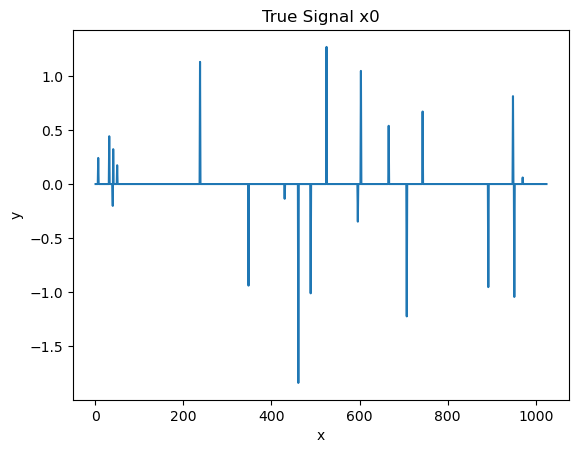

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# random seed
np.random.seed(23)

# Size of signal
n = 1024

# Sparsity (# nonzeros) in the signal
s = 20

# Number of samples (undersample by a factor of 8)
m = 128

# Generate and display the signal
x0 = np.zeros(n)
nonzero_indices = np.random.choice(np.arange(n), s)
x0[nonzero_indices] = np.random.randn(s)

# Generate the random sampling matrix
A = np.random.randn(m, n) / m

# Subsample by multiplexing
y = A.dot(x0)

# Plot the true signal
plt.figure()
plt.title("True Signal x0")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(np.arange(1, n+1), x0)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

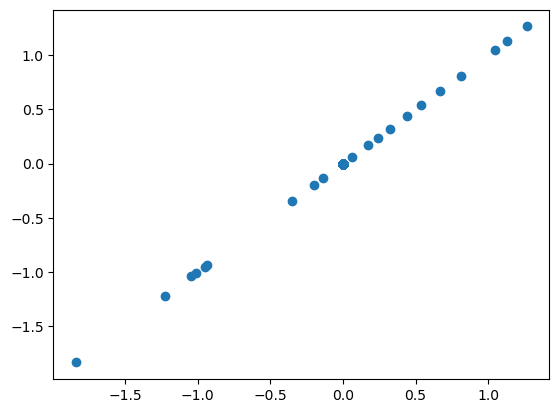

In [3]:
from scipy.optimize import linprog

## Method 1

vF = np.ones(2 * n)

mAeq = np.hstack((A, -A))
vBeq = y

vLowerBound = np.zeros(2 * n)
vUpperBound = np.inf * np.ones(2 * n)

res = linprog(vF, A_eq=mAeq, b_eq=vBeq, bounds=list(zip(vLowerBound, vUpperBound)))

vX = res.x[:n] - res.x[n:]

plt.scatter(x0, vX)
plt.show

2048
(128, 2048)
2048
Optimization status: Optimization terminated successfully. (HiGHS Status 7: Optimal)


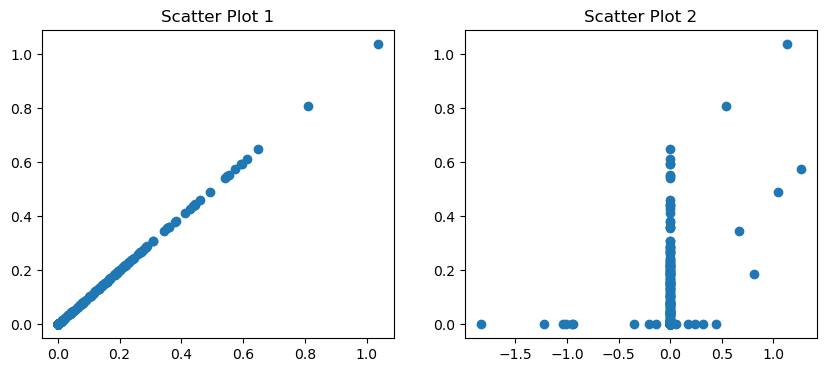

In [4]:
## Method 2

c = np.block([np.zeros(n),np.ones(n)])
print(len(c))

A_eq = np.block([A, np.zeros((m,n))] )
print(A_eq.shape)
b_eq = y

I = np.eye(n)
A_ub = np.block([[I, -I],
                 [-I, -I]])

b_ub = np.zeros(2*n)
print(len(b_ub))

lp = linprog(c, A_ub = A_ub, b_ub = b_ub, A_eq=A_eq, b_eq=b_eq, method = 'highs-ipm')


print("Optimization status:", lp.message)
x_sol = lp.x[:n]
t_sol = lp.x[n:]

# Scatter plot 1
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Create a figure with two subplots
ax1, ax2 = axs  # Assign the axes to variables

ax1.scatter(x_sol, t_sol)
ax1.set_title("Scatter Plot 1")

# Scatter plot 2
ax2.scatter(x0, x_sol)
ax2.set_title("Scatter Plot 2")

plt.show()

obj val= 14.392566762494843


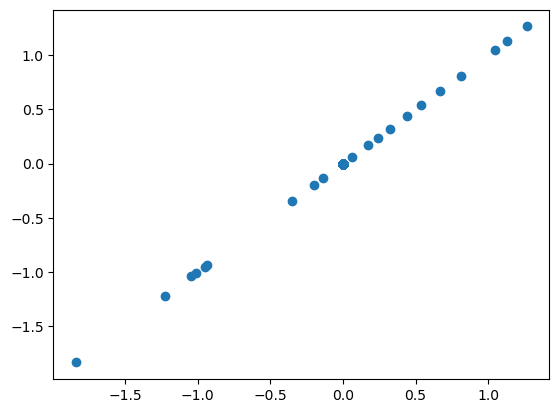

In [5]:
import cvxpy as cp
import numpy as np

x = cp.Variable(n)

# Create the optimization problem
objective = cp.Minimize(cp.norm(x, 1))
constraints = [A @ x == y]
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Retrieve the solution
x_sol = x.value

print("obj val=", problem.solve())

plt.scatter(x0, x_sol)
plt.show()

### Quantile regression



- Linear regression models the mean of the response. 

- However, in certain cases, the error variance may not be constant, the distribution of the response variable may exhibit asymmetry, or we may be interested in capturing specific quantiles of the response variable. 

- In such situations, quantile regression provides a more suitable modeling approach.


<div>
<img src="quantreg.png" alt="Quantile Regression" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{quantreg.png}
\end{center}

- In a $\tau$-quantile regression, we minimize the loss function 
$$
f(\beta) = \sum_{i=1}^{n} \rho_{\tau}(y_i - x_i^T\beta),
$$ 
where $\rho_{\tau}(z) = z(\tau - 1_\{z < 0\})$. Writing $y - X\beta = r^+ - r^-$, this is equivalent to the LP

$$
\begin{aligned}
\text{minimize } & \tau^T 1^Tr^+ + (1 - \tau) 1^T r^- = y - X\beta \\
\text{subject to } & r^+ - r^- = y - X\beta \\
& r^+ \succeq 0, r^- \succeq 0
\end{aligned}
$$
in $r^+$, $r^-$, and $\beta$.

### $\ell_1$ Regression

A popular method in robust statistics is the median absolute deviation (MAD) regression that minimizes the $\ell_1$ norm of the residual vector $||\mathbf{y} - \mathbf{X}\boldsymbol{\beta}||_1$. This apparently is equivalent to the LP
$$
\begin{aligned}
\text{minimize} \quad & 1^T(\mathbf{r}^+ + \mathbf{r}^-) \\
\text{subject to} \quad & \mathbf{r}^+ - \mathbf{r}^- = \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \\
& \mathbf{r}^+ \succeq 0, \quad \mathbf{r}^- \succeq 0
\end{aligned}
$$
in $\mathbf{r}^+$, $\mathbf{r}^-$, and $\boldsymbol{\beta}$.

$\ell_1$ regression = MAD = median-quantile regression.


### Dantzig selector

- [Candes and Tao 2007](https://projecteuclid.org/journals/annals-of-statistics/volume-35/issue-6/The-Dantzig-selector--Statistical-estimation-when-p-is-much/10.1214/009053606000001523.full) Propose a variable selection method called the Dantzig selector that solves:
$$
\text{minimize } ||X^T(y - X\beta)||_\infty \\
\text{subject to } \sum_{j=1}^p |\beta_j| ≤ t,
$$
which can be transformed to an LP. 

- The method is named after George Dantzig, who invented the simplex method for efficiently solving LPs in the 1950s.

## Quadratic Programming


<div>
<img src="qp.jpg" alt="QP" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.75\textwidth]{qp.jpg}
\end{center}


- A quadratic program (QP) has a quadratic objective function and affine constraint functions:

$$
\begin{aligned}
\text{minimize }& \frac{1}{2}\mathbf{x}^T\mathbf{P}\mathbf{x} + \mathbf{q}^T\mathbf{x} + \mathbf{r}\\
\text{subject to }& \mathbf{G}\mathbf{x} \preceq \mathbf{h}\\
           & \mathbf{A}\mathbf{x} = \mathbf{b},
\end{aligned}
$$
where we require $\mathbf{P} \in \mathbb{S}^n_+$ (why?). Apparently, linear programming (LP) is a special case of QP with $\mathbf{P} = \mathbf{0}_{n \times n}$.

### Examples

- Least squares with linear constraints. For example, nonnegative least squares (NNLS)

$$
\begin{aligned}
\text{minimize }& \frac{1}{2}\|\mathbf{y} - \mathbf{X}\mathbf{\beta}\|_2^2 \\
\text{subject to }& \mathbf{\beta} \succeq \mathbf{0} 
\end{aligned}
$$

- Lasso ([Tibshirani 1996](https://www.jstor.org/stable/2346178)) minimizes the least squares loss with the $\ell_1$ (lasso) penalty
$$
\text{minimize }\frac{1}{2}\|\mathbf{y} - \beta_0\mathbf{1} - \mathbf{X}\mathbf{\beta}\|_2^2 + \lambda \|\mathbf{\beta}\|_1,
$$
where $\lambda> 0$ is the tuning parameter.

    - Write $\beta = \beta^+ - \beta^-$, the equivalent QP is
$$
\begin{aligned}
\text{minimize }& \quad \frac{1}{2}(\beta^+ - \beta^-)^T X^T (I - \frac{1}{n}11^T) X (\beta^+ - \beta^-) +\\
& y^T (I - \frac{1}{n}11^T) X (\beta^+ - \beta^-) + \lambda 1^T (\beta^+ + \beta^-) \\
\text{subject to }& \quad \beta^+ \succeq 0, \quad \beta^- \succeq 0
\end{aligned}
$$    
in $\beta^+, \beta^-$.


<div>
<img src="ridge.jpg" alt="ridge" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.7\textwidth]{ridge.jpg}
\end{center}


<div>
<img src="lasso.jpg" alt="Lasso" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.7\textwidth]{lasso.jpg}
\end{center}

- Elastic Net [Zou and Hastie (2005)](https://www.jstor.org/stable/3647580):

$$
\text{minimize }\frac{1}{2}\|\mathbf{y} - \beta_0\mathbf{1} - \mathbf{X}\mathbf{\beta}\|_2^2 + \lambda \left( \alpha \|\mathbf{\beta}\|_1 + (1-\alpha) \|\mathbf{\beta}\|_2^2 \right),
$$


<div>
<img src="lena.jpg" alt="Lena" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.7\textwidth]{lena.jpg}
\end{center}

- Image denoising by the total variation (TV) penality or the anisotropic penalty
$$
\frac{1}{2}\|y - x\|_F^2 + \lambda \sum_{i,j} \sqrt{(x_{i+1,j} - x_{i,j})^2 + (x_{i,j+1} - x_{i,j})^2}.
$$

$$
\frac{1}{2}\|y - x\|_F^2 + \lambda \sum_{i,j} \left(|x_{i+1,j} - x_{i,j}| + |x_{i,j+1} - x_{i,j}| \right).
$$

- The Huber loss
$$
\phi(r) = \begin{cases}
\frac{r^2}{M} & \text{if } |r| \leq M \\
r^2 - 2M|r| + M^2 & \text{if } |r| > M
\end{cases}
$$
is commonly used in robust statistics. The robust regression problem
$$
\text{minimize }\sum_{i=1}^{n} \phi(y_i - \beta_0 - x_i^T\beta)
$$
can be transformed to a QP
$$
\begin{aligned}
\text{minimize }\quad & u^Tu + 2M1^Tv - u^T v \\
\text{subjec to }\quad & u - v \preceq y - X\beta \preceq u + v\\
& 0 \preceq u \preceq M1, \quad v \succeq 0
\end{aligned}
$$
in $u, v \in \mathbb{R}^n$ and $\beta \in \mathbb{R}^p$. Hint: write $|r_i| = (|r_i| \wedge M) + (|r_i| - M) = u_i + v_i$.

- Support Vector Machines (SVM) In two-class classification problems, we are given training data $(\mathbf{x}_i, y_i), i=1,\ldots,n$, where $\mathbf{x}_i \in \mathbb{R}^n$ are feature vectors and $y_i \in \{-1,1\}$ are class labels. The SVM solves the optimization problem:

$$
\text{minimize } \sum_{i=1}^{n} \left[1 - y_i(\beta_0 + \sum_{j=1}^{p} x_{ij}\beta_j)\right]_+ + \lambda\|\beta\|_2^2,
$$
where $\lambda \geq 0$ is a tuning parameter. This is a quadratic programming problem.


In [6]:
## jupyter nbconvert --TagRemovePreprocessor.remove_input_tags='{"hide_code"}' --to pdf Opt_top.ipynb